# Mission : It's Your Turn!

## 2. Kaggle에서 Dataset을 찾고, Dataset에서 유의미한 Feature를 3개 이상 찾고 시각화

### 0. 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
batting = pd.read_csv('C:/Users/82103/Desktop/Devcourse/data/baseball/Batting.csv')
batting.head()

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
0,abercda01,1871,1,TRO,NaN,1,4.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN
1,addybo01,1871,1,RC1,NaN,25,118.0,30.0,32.0,6.0,...,13.0,8.0,1.0,4.0,0.0,NaN,NaN,NaN,NaN,NaN
2,allisar01,1871,1,CL1,NaN,29,137.0,28.0,40.0,4.0,...,19.0,3.0,1.0,2.0,5.0,NaN,NaN,NaN,NaN,NaN
3,allisdo01,1871,1,WS3,NaN,27,133.0,28.0,44.0,10.0,...,27.0,1.0,1.0,0.0,2.0,NaN,NaN,NaN,NaN,NaN
4,ansonca01,1871,1,RC1,NaN,25,120.0,29.0,39.0,11.0,...,16.0,6.0,2.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN


## 데이터가 너무 많아 가장 최근인 2015년 기록으로 시각화진행

In [5]:
recent = batting[batting['yearID'].isin(['2015'])]
recent.head(5)

,playerID,yearID,stint,teamID,lgID,G,AB,R,H,2B,...,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP
99846,aardsda01,2015,1,ATL,NL,33,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
99847,abadfe01,2015,1,OAK,AL,62,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99848,abreujo02,2015,1,CHA,AL,154,613.0,88.0,178.0,34.0,...,101.0,0.0,0.0,39.0,140.0,11.0,15.0,0.0,1.0,16.0
99849,achteaj01,2015,1,MIN,AL,11,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
99850,ackledu01,2015,1,SEA,AL,85,186.0,22.0,40.0,8.0,...,19.0,2.0,2.0,14.0,38.0,0.0,1.0,3.0,3.0,3.0


In [9]:
#변수 확인

recent.describe()

,yearID,stint,G,AB,R,H,2B,3B,HR,RBI,SB,CS,BB,SO,IBB,HBP,SH,SF,GIDP,HH
count,1486.0,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000,1486.000000
mean,2015.0,1.096904,47.465680,111.364738,13.894347,28.335128,5.546433,0.631898,3.303499,13.223419,1.685734,0.716016,9.470390,25.199192,0.639973,1.078062,0.807537,0.829071,2.516151,34.513459
std,0.0,0.309279,44.777758,174.890616,23.972998,47.498992,9.534636,1.546506,6.866506,23.508546,4.887574,1.756596,17.470518,38.210625,1.971580,2.494026,1.758281,1.730025,4.675541,57.810693
min,2015.0,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2015.0,1.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2015.0,1.000000,31.000000,12.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,2015.0,1.000000,68.000000,155.000000,17.000000,39.750000,7.000000,0.000000,3.000000,17.000000,1.000000,0.000000,12.000000,36.000000,0.000000,1.000000,1.000000,1.000000,3.000000,48.000000
max,2015.0,3.000000,162.000000,638.000000,122.000000,205.000000,45.000000,15.000000,47.000000,130.000000,58.000000,20.000000,143.000000,208.000000,29.000000,30.000000,14.000000,11.000000,28.000000,244.000000


### 1. 홈런을 많이 치는 선수는 삼진을 많이 당하지 않을까?

- 보통 홈런타자는 강타자이므로 삼진을 잘 당하지 않을 것으로 생각....

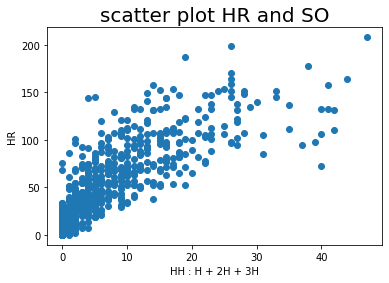

In [46]:
plt.scatter(recent['HR'],recent['SO'])
plt.title('scatter plot HR and SO',size = 20) # HR: 홈런, SO : 삼진
plt.xlabel('HR')
plt.ylabel('SO')
plt.show()

#### 산점도 확인결과 생각보다 양의 상관관계를 보임

#### 홈런타자 일수록 삼진을 많이 당한다....로 보임

### 2,3. 어떤팀이 홈런타자, 발빠른 타자를 많이 보유하였나

In [55]:
## 20개의 홈런과 20개의 도루 이상을 한 선수들을 추출 
## 팀별 groupby를 통해 갯수 확인
recent2 = recent[recent['HR']>=20]
recent3 = recent[recent['SB']>=20]
team1 = recent2['HR'].groupby(recent2['teamID']).count()
team2 = recnet3['SB'].groupby(recent3['teamID']).count()

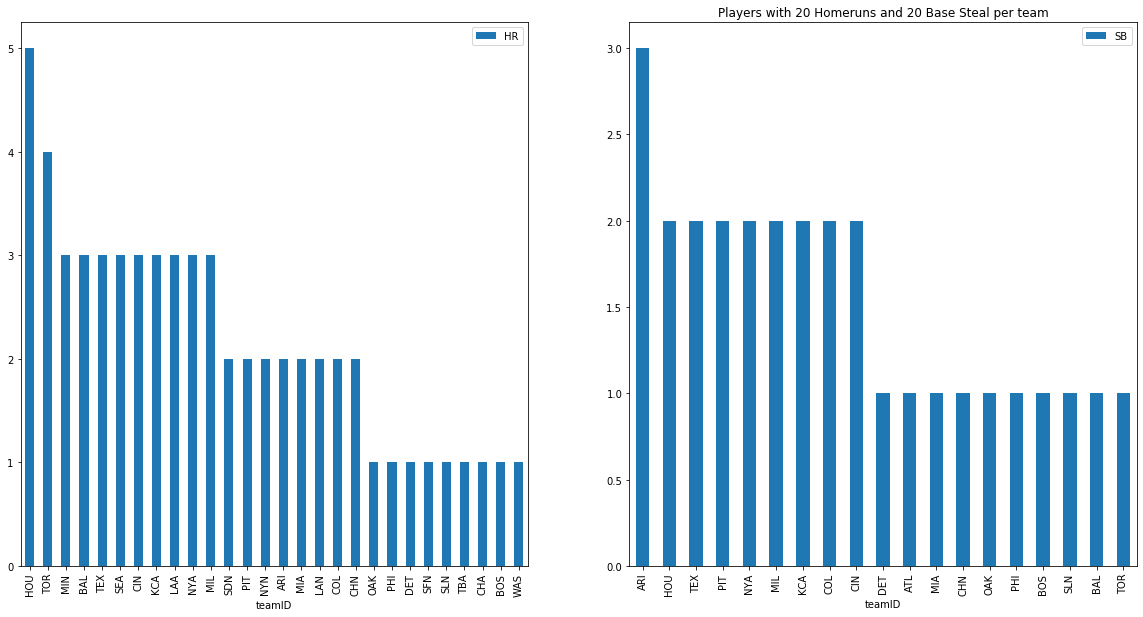

In [61]:
f, ax = plt.subplots(1,2, figsize=(20,10))
recent2[['teamID','HR']].groupby(['teamID'],as_index=True).count().sort_values(by='HR',ascending=False).plot.bar(ax=ax[0])
recent3[['teamID','SB']].groupby(['teamID'],as_index=True).count().sort_values(by='SB',ascending=False).plot.bar(ax=ax[1])
plt.show()

### HOU(휴스턴) 팀이 홈런 20개이상인 선수가 5명, 도루 20개 이상의 선수가 2명으로 높은 순위를 보임

- 추가적인 데이터로 이런 선수들이 많을 때 팀 순위를 분석 해보면 좋을 것 같음
